In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from skimage import io
import time

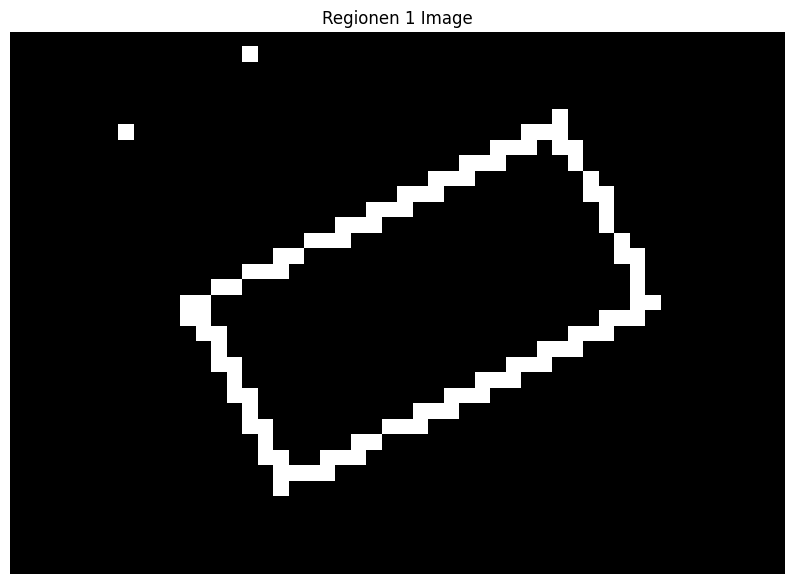

In [36]:
#Bild auswaehlen, bei bild eins in zweiter Zelle umdrehen notwendig
image = io.imread('regionen2.png')
#Nur einen Kanal verwenden, da es ein Graustufenbild ist
image = image[:, :, 0] 
#Bild in binaer umwandel
image = np.where(image > 0, 1, 0)

#Bild einmal wie eingelesen Darstellen
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Regionen 1 Image')
plt.show()

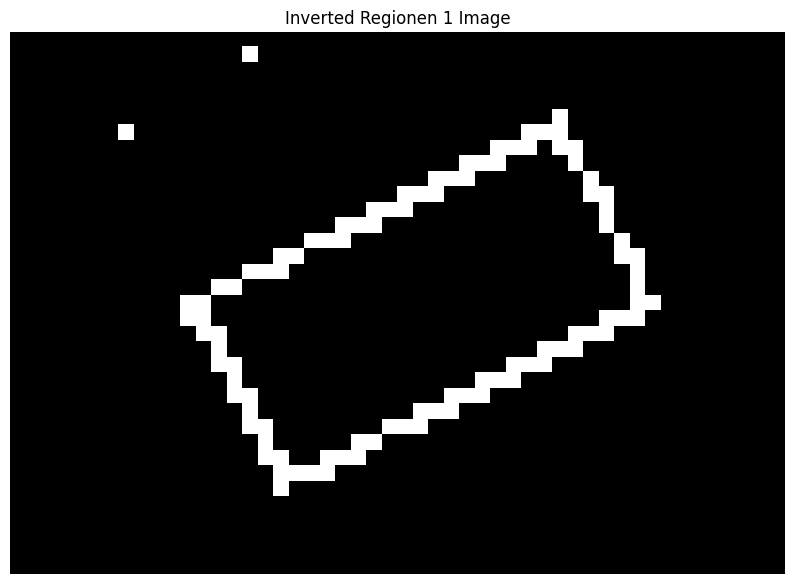

In [37]:
#Bild invertieren
#image = 1 - image
#und darstellen
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Inverted Regionen 1 Image')
plt.show()

In [38]:
#eigens entwickelte und selbstgeschriebene nur durch mich umsetzbare funktion zum anzeigen der bilder mit unterschiedlichen Farben
def display_colored_image(image):
    image = np.array(image)
    unique_vals = np.unique(image)
    
    # Create a mapping from each unique value to an integer index
    val_to_index = {val: i for i, val in enumerate(unique_vals)}
    
    # wer das liest ist doof
    indexed_image = np.vectorize(val_to_index.get)(image)
    
    # Pick a colormap that supports many distinct colors
    cmap = plt.get_cmap('nipy_spectral', len(unique_vals))  # e.g., 'nipy_spectral', 'hsv', 'tab20', 'turbo'
    
    # Show the image
    plt.imshow(indexed_image, cmap=cmap)
    plt.axis('off')
    plt.show()

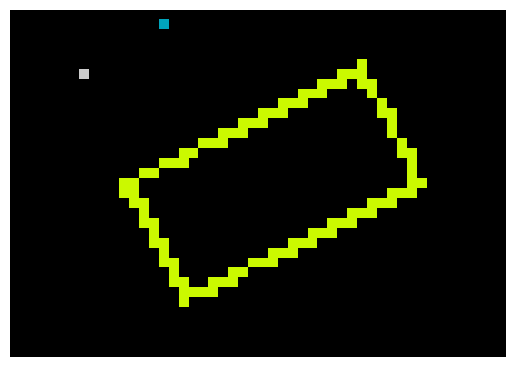

In [39]:

#funktion zum sequentiellen Labeln der Regionen
def sequential_labelling(image):
    #variable, die wenn gesetzt, die Ausgabe der einzelnen Schritte anzeigt
    sequential_processing = 0
    #start mit label eins groesser als vordergrund
    label = 2
    #set fuer die kolliisionen 
    collisions = set()
    x, y = image.shape
    #bild durchgehen
    for v in range(1, x):
        for u in range(1, y-1):
            #wenn wir vordergrund gefunden haben
            if image[v, u] == 1:
                #schauen uns nachbarn an und schreiben sie in liste
                neighbors = [
                    image[v, u-1],     # links
                    image[v-1, u-1],   # oben links
                    image[v-1, u],     # oben
                    image[v-1, u+1]    # oben mein gedankengut
                ]
                #jeden nachbar mit label in liste
                labeled_neighbors = [n for n in neighbors if n > 1]
                # zaehlen wie viele nachbarn wir schon mit label versehen haben
                count = len(labeled_neighbors)
                # wenn kein nachbar mit label dann
                if count == 0:
                    #from now on in english, since thats more fun set label to current label
                    image[v, u] = label
                    if (sequential_processing):
                        display_colored_image(image)
                        print("labeled " + str(v) + ", " + str(u) + " with label " + str(label) + " with no neighbors")
                    #increase label for next foreground pixel
                    label += 1

                #If there is only one labeled neighbor
                elif count == 1:
                    # we set ourselves to label of already labeled neighbor
                    image[v, u] = labeled_neighbors[0]
                    if sequential_processing:
                        display_colored_image(image)
                        print("labeled " + str(v) + ", " + str(u) + " with label " + str(labeled_neighbors[0]) + " with one neighbor")
                                
                else:
                    #in this case we have multiple neighbors with labels
                    # Take the first label
                    labeling = labeled_neighbors[0]
                    # Set the current pixel to this label
                    image[v, u] = labeling
                    if sequential_processing:
                        display_colored_image(image)
                        print("labeled " + str(v) + ", " + str(u) + " with label " + str(labeling) + " with multiple neighbors")
                    # Register collisions with all other labels
                    for other_label in labeled_neighbors[1:]:
                        if other_label != labeling:
                            collisions.add((other_label, labeling))

    #count the number of lables
    unique_entries= np.unique(image)
    #make list with sets of labels
    labellings = [set([val]) for val in unique_entries]

    # Merge sets for each collision
    for a in collisions:
        one = two = None
        # Find the indices of the sets containing the collision labels
        for j in range(len(labellings)):
            if a[0] in labellings[j]:
                one = j
            if a[1] in labellings[j]:
                two = j
        # Only merge if both labels are found and indices are different
        if one is not None and two is not None and one != two:
            # Merge the sets
            labellings[one] = labellings[one].union(labellings[two])
            labellings.pop(two)
         
    #last step is to relabel the image, with lowest label in each set  
    for v in range(x):
        for u in range(y):
            if image[v, u] > 1:
                for i in range(len(labellings)):
                    if image[v, u] in labellings[i]:
                        image[v, u] = min(labellings[i])

    


                


#copy image since ill otherwise get confused with ipynb 
copied_image = image.copy()
sequential_labelling(copied_image)
display_colored_image(copied_image)

                    